# Applicazione Fourier su segnali discreti

Generiamo un segnale composto da due sinusoidi con frequenze 400Hz campionato a  44100 Hz per 5 secondi.

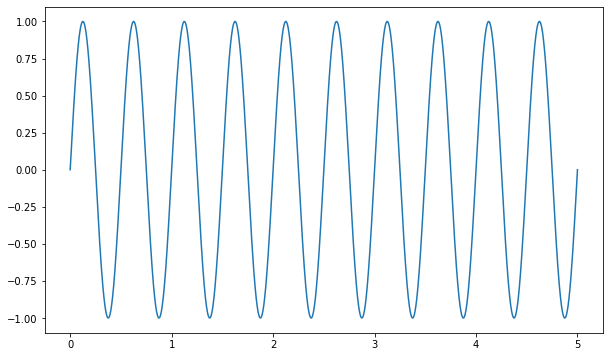

In [24]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.show()

Generiamo un disturbo a 4000 Hz e lo sommiamo al segnale.
Per poterlo salvare in un file wav dobbiamo normalizzarlo.

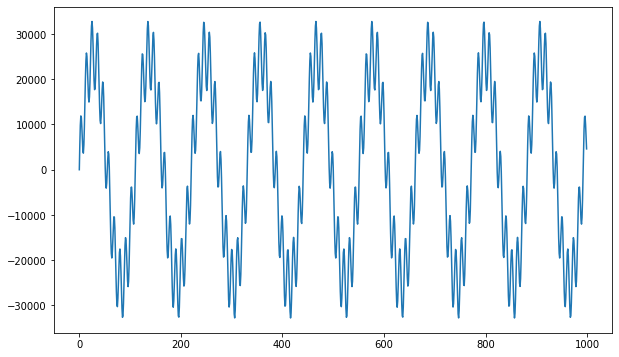

In [49]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.figure(figsize=(10,6))
plt.plot(normalized_tone[:1000])
plt.show()

Salviamo il segnale in un file wav e visualizziamo il grafico del segnale e il suo spettro.

In [27]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("filtro/input.wav", SAMPLE_RATE, normalized_tone)

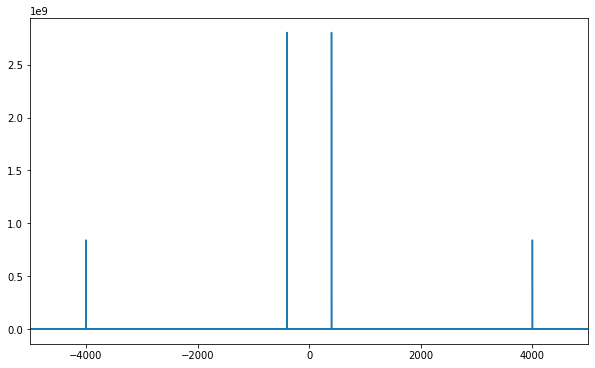

In [36]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.figure(figsize=(10,6))
plt.plot(xf, np.abs(yf))
plt.xlim(-5000, 5000)
plt.show()

Visto che il segnale è reale possiamo utilizzare la trasformata solo sulla metà dei campioni.

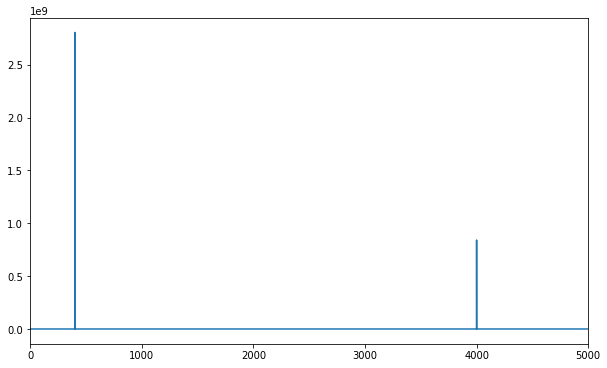

In [37]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.figure(figsize=(10,6))
plt.plot(xf, np.abs(yf))
plt.xlim(0, 5000)
plt.show()

Identifichiamo la posizione della frequenza del disturbo.

In [44]:
# Our target frequency is 4000 Hz
target_idx = int(DURATION* 4000)

Cancelliamo il disturbo e visualizziamo il grafico del segnale e il suo spettro.

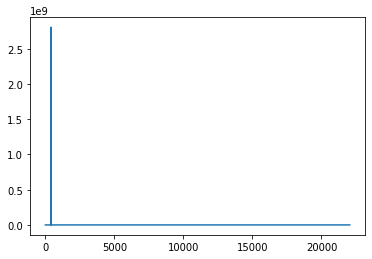

In [46]:
yf[target_idx - 2 : target_idx + 3] = 0 +0j

plt.plot(xf, np.abs(yf))
plt.show()

Salviamo il segnale in un file wav.

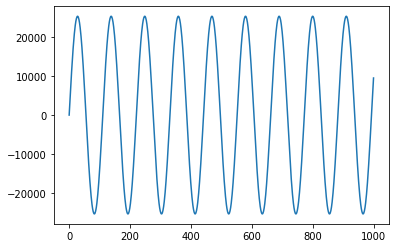

In [47]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("filtro/clean.wav", SAMPLE_RATE, norm_new_sig)